# ⁕ Term Deposite Subscriptions Prediction - Bank Marketing Campaign ⁕ 

#### • What is Term Deposite?
A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

#### • Data Description
This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

#### • Feature
 1.   age - age in years     
 2.   job - type of job  
 3.  marital - marital status
 4.  education - education background  
 5.   default - has credit in default? 
 6.   balance - Balance of the individual  
 7.   housing - has housing loan?
 8.   loan -    has personal loan? 
 9.   contact - contact communication type   
 10.   day -   last contact day of the week  
 11.  month -   last contact month of year  
 12.  duration - last contact duration, in seconds 
 13.  campaign - number of contacts performed during this campaign and for this client 
 14.  pdays - number of days that passed by after the client was last contacted from a previous campaign    
 16.  previous - number of contacts performed before this campaign and for this client 
 17.  poutcome - outcome of the previous marketing campaign  
 
  
#### • Target Feature
  1. deposit -  has the client subscribed a term deposit?


In [1]:
#importing required libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Now Create a dataframe to read data set
df = pd.read_csv("bank.csv")

In [3]:
#Check the data set 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
#Check the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
#Check the Number of rows and columns
df.shape

(11162, 17)

In [6]:
#Check statistical information of data set
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## • Exploratory Data Analysis
1. Find Missing Values
2. Number of unique value in each column
3. Find Features with one value
4. Explore the Categorical Features
5. Find Categorical Feature Distribution
6. Relationship between Categorical Features and Label
7. Explore the Numerical Features
8. Find Discrete Numerical Features
9. Relation between Discrete numerical Features and Labels
10. Find Continous Numerical Features
11. Distribution of Continous Numerical Features
12. Relation between Continous numerical Features and Labels
13. Find Outliers in numerical features
14. Explore the Correlation between numerical features
15. Find Unwanted Columns
16. Check the Data set is balanced or not based on target values in classification

In [7]:
#Find missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### •Observation:
No null value found in dataset

In [75]:
#Find count of unique values in each column
unique_value = df.nunique()
unique_value

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

### • Observation :
1. Numerical features are: age,balance,day,duration,campaign,pdays,previous
2. categorical features are: job,marital,education,default,housing,loan,contract,month,poutcome,deposite

In [9]:
# creating a dataframe categorical features
categorical_feature = df.drop(columns=['age','balance','day','duration','campaign','pdays','previous','deposit'],axis=1)
print(categorical_feature.nunique())
categorical_feature
#we droppped deposite as it is target column

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64


,job,marital,education,default,housing,loan,contact,month,poutcome
0,admin.,married,secondary,no,yes,no,unknown,may,unknown
1,admin.,married,secondary,no,no,no,unknown,may,unknown
2,technician,married,secondary,no,yes,no,unknown,may,unknown
3,services,married,secondary,no,yes,no,unknown,may,unknown
4,admin.,married,tertiary,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown
11158,services,married,secondary,no,no,no,unknown,jun,unknown
11159,technician,single,secondary,no,no,no,cellular,aug,unknown
11160,technician,married,secondary,no,no,yes,cellular,may,failure


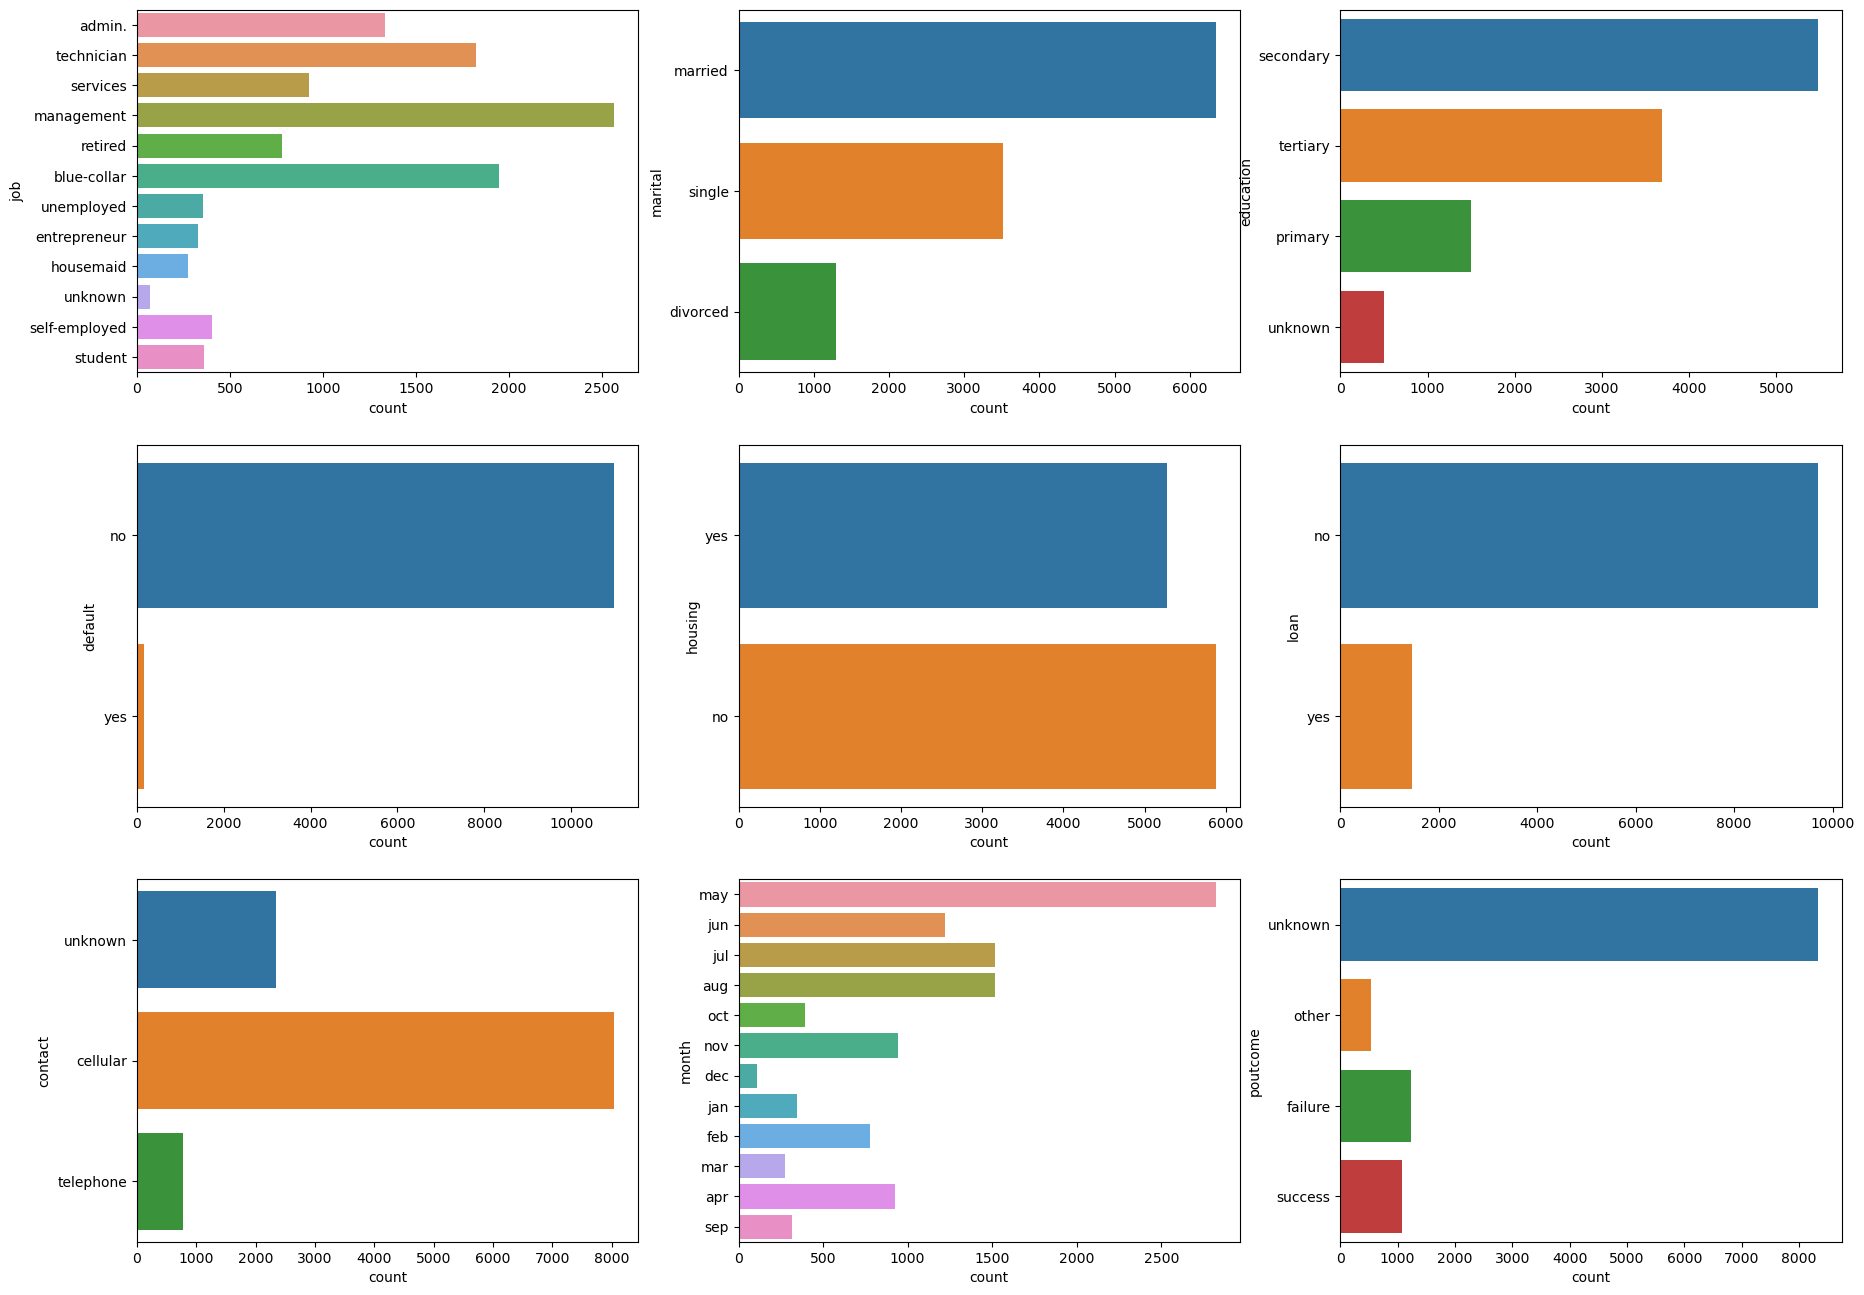

In [10]:
#Finding categorical feature distribution using countplot
fig, axes = plt.subplots(3,3, figsize=(22,16))
sns.countplot(data=df, y='job', ax=axes[0, 0])
sns.countplot(data=df, y='marital',ax=axes[0, 1])
sns.countplot(data=df, y='education', ax=axes[0, 2])
sns.countplot(data=df, y='default', ax=axes[1, 0])
sns.countplot(data=df, y='housing', ax=axes[1, 1])
sns.countplot(data=df, y='loan', ax=axes[1,2])
sns.countplot(data=df, y='contact', ax=axes[2, 0])
sns.countplot(data=df, y='month', ax=axes[2, 1])
sns.countplot(data=df, y='poutcome', ax=axes[2, 2])
plt.show()

### • Observation :
1. client with job type as management records are high in given dataset and housemaid are very less
2. client who married are high in records in given dataset and divorced are less
3. client whoes education background is secondary are in high numbers in given dataset
4. defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
5. data in month of may is high and less in dec

In [11]:
#Check Target feature distribution and count in categorical feature 
print(df.groupby(['deposit','job']).size())
print(df.groupby(['deposit','marital']).size())
print(df.groupby(['deposit','education']).size())
print(df.groupby(['deposit','default']).size())
print(df.groupby(['deposit','housing']).size())
print(df.groupby(['deposit','loan']).size())
print(df.groupby(['deposit','contact']).size())
print(df.groupby(['deposit','month']).size())
print(df.groupby(['deposit','poutcome']).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

### • Observations :
1. retired client has high interest on deposit
2. client who has housing loan seems to be not interested much on deposit
3. if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
4. in month of March, September, October and December, client show high interest to deposit
5. in month of may, records are high but client interst ratio is very less

In [12]:
#Creating a dataframe for numerical features
numerical_feature = df.drop(columns=['job','marital','education','default','housing','loan','contact','month','poutcome','deposit'],axis=0)
numerical_feature

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


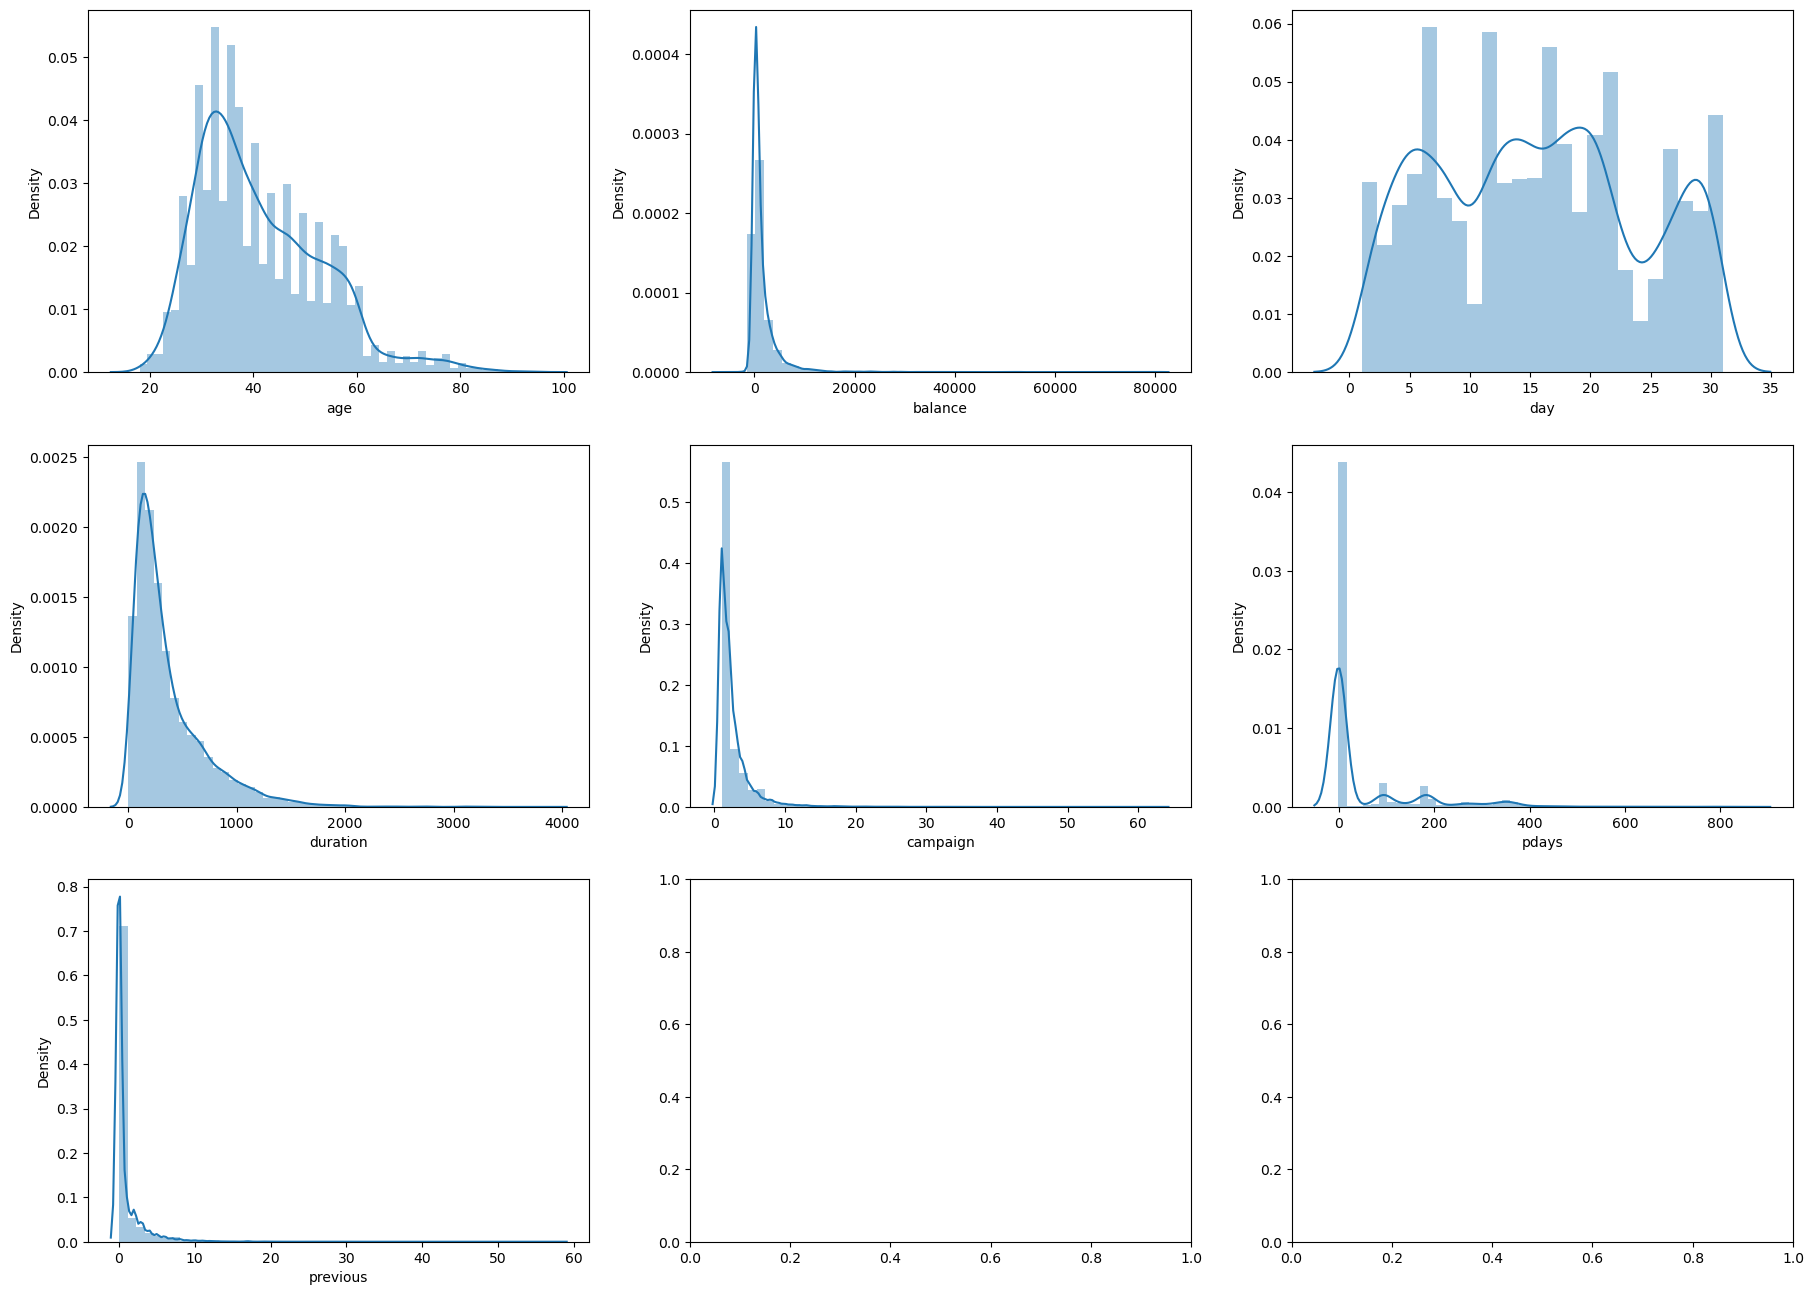

In [13]:
#plotting graph to find skewness in numerical column
fig, axes = plt.subplots(3,3, figsize=(22,16))
sns.distplot(df['age'],ax=axes[0, 0])
sns.distplot(df['balance'],ax=axes[0, 1])
sns.distplot(df['day'],ax=axes[0, 2])
sns.distplot(df['duration'],ax=axes[1, 0])
sns.distplot(df['campaign'],ax=axes[1, 1])
sns.distplot(df['pdays'],ax=axes[1, 2])
sns.distplot(df['previous'],ax=axes[2, 0])
plt.show()

### • Observation : 
1. age, days distributed normally
2. balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

<Axes: xlabel='previous'>

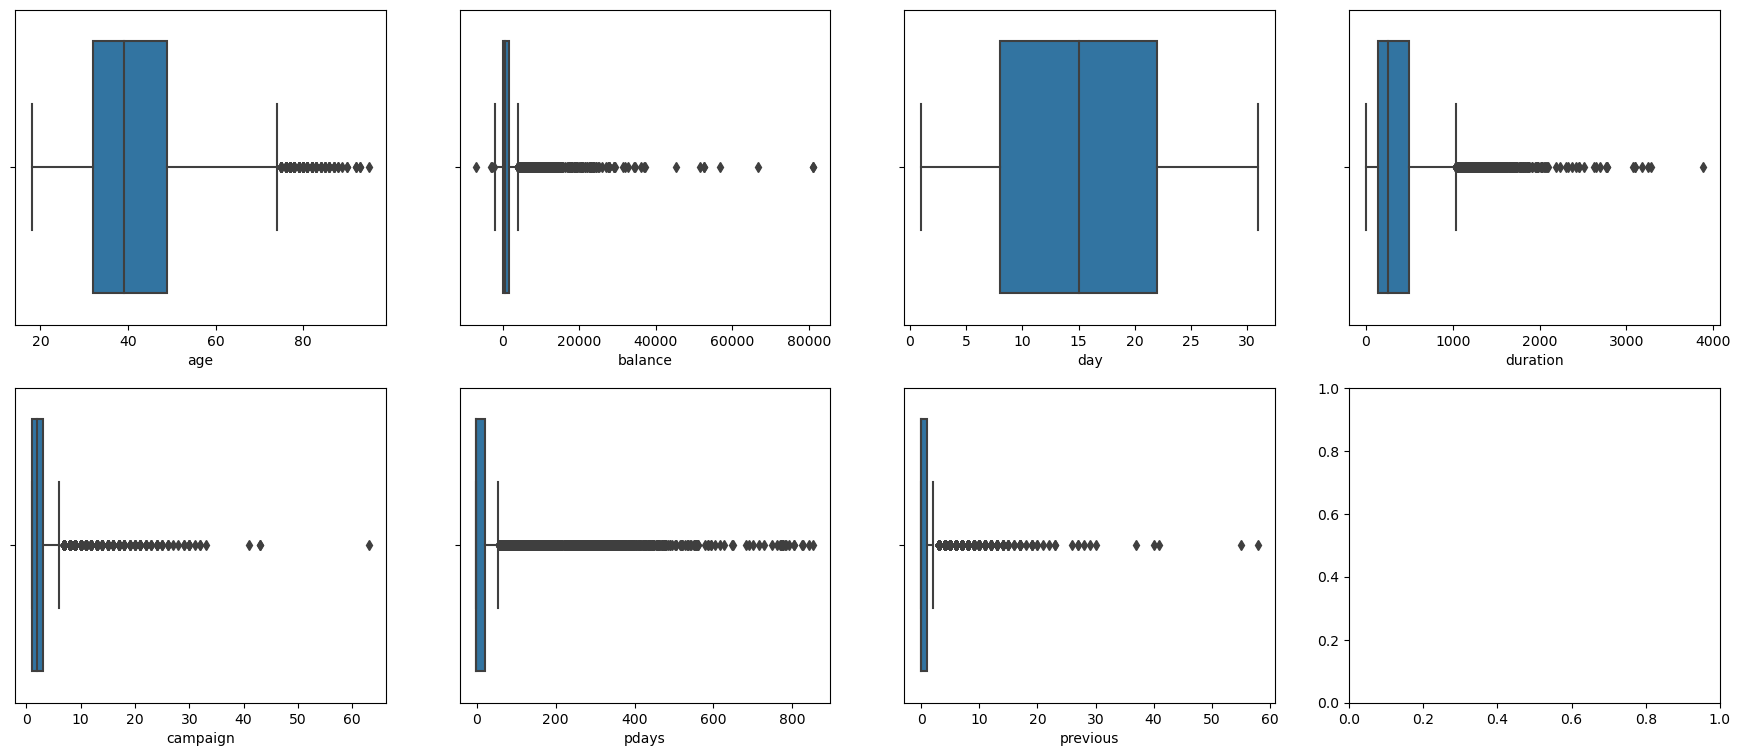

In [14]:
#Plotting Boxplot on numerical features to identify outliers
fig, axes = plt.subplots(2,4, figsize=(22,9))
sns.boxplot(data=df,x='age',ax=axes[0,0])
sns.boxplot(data=df,x='balance',ax=axes[0,1])
sns.boxplot(data=df,x='day',ax=axes[0,2])
sns.boxplot(data=df,x='duration',ax=axes[0,3])
sns.boxplot(data=df,x='campaign',ax=axes[1,0])
sns.boxplot(data=df,x='pdays',ax=axes[1,1])
sns.boxplot(data=df,x='previous',ax=axes[1,2])

### • Observations :
age, balance, duration, compaign, pdays and previous has some outliers

<Axes: >

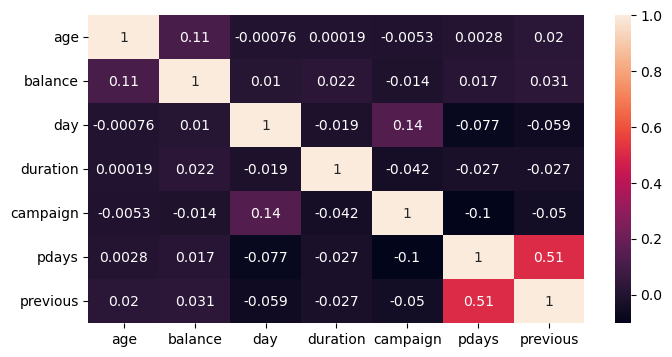

In [15]:
#Checking correlation betweeen numerical feature using heatmap
cor_mat=df.corr()
fig = plt.figure(figsize=(8,4))
sns.heatmap(cor_mat,annot=True)

### • Observation : 
No feature is heavily corelated

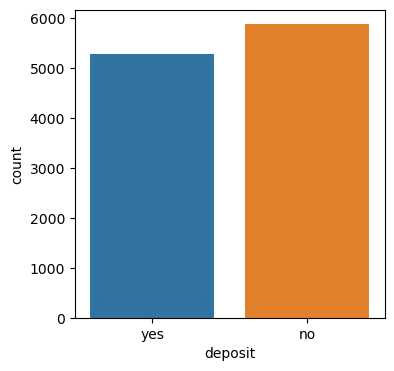

In [16]:
#Chcking if target feature data is balanced or not
plt.figure(figsize=(4,4))
sns.countplot(x='deposit',data=df)
plt.show()

In [17]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

### • Observations:
given dataset is balanced.

#### • As per Exploratory Data Analysis:
1. no missing value found
2. no feature found with one value
3. 9 categorical features
4. it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

### • Feature Engineering
1. Drop unwanted Features
2. Handle Missing Values
3. Handle Categorical Features
4. Handle Feature Scalling
5. Remove Outliers

In [18]:
#Creating a duplicate dataframe for feature engineering
df2=df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [19]:
df2.shape

(11162, 17)

In [20]:
#from feature distribution we have observed that some feature have abnormal distribution of data
df2.groupby(['deposit','default']).size()
#default feature does not play important role 

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [21]:
#dropping default feature 
df2.drop(['default'],axis=1,inplace=True)

In [22]:
#pdays is highly skewed data
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [23]:
#droping pdays as it has -1 value for around 40%+
df2.drop(['pdays'],axis=1,inplace=True)

In [24]:
#Finding outliers present in Age feature
df2.groupby('age')['age'].count()
#these outliers can be ignored as age values lies between 18 to 95

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [25]:
#Finding outliers in balance feature
df2.groupby(['deposit','balance'],sort=True)['balance'].count()
#these outliers should not be removed as balance goes high client shows high interest in deposite i.e. they are corelated

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [26]:
#Finding outliers in duration feature
df2.groupby(['deposit','duration'],sort=True)['duration'].count()
#these outliers also should not be removed duration goes high client shows higher interest in deposite

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [27]:
#Finding outliers in campaign feature
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [28]:
#from above observation we can conclude that campaign greater than 33 are outliers and must be dropped
df3 = df2[df2['campaign'] < 33]

In [29]:
#Rechecking droppped outliers
df3.groupby(['deposit','campaign'])['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [30]:
#Finding outliers present in previous feature
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [31]:
#from above observations we can conclude that previous feature with value greater that 31 are outliers and must be dropped
df4 = df3[df3['previous'] < 31]
df4

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,cellular,20,apr,257,1,0,unknown,no
11158,39,services,married,secondary,733,no,no,unknown,16,jun,83,4,0,unknown,no
11159,32,technician,single,secondary,29,no,no,cellular,19,aug,156,2,0,unknown,no
11160,43,technician,married,secondary,0,no,yes,cellular,8,may,9,2,5,failure,no


### • Observations : 
1. Day feature did not contain any outlier
2. Outliers present in age,balance and duration should not be removed
3. outliers present in campaign,previous column must be dropped

### • Splitting Dataset into Train-Test set 

In [32]:
#Finding categorical columns for encoding
cat_col=df4.select_dtypes(object).columns
cat_col

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'poutcome', 'deposit'],
      dtype='object')

In [33]:
#Encoding the column using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df4[cat_col]=oe.fit_transform(df4[cat_col])
df4.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0.0,1.0,1.0,2343,1.0,0.0,2.0,5,8.0,1042,1,0,3.0,1.0
1,56,0.0,1.0,1.0,45,0.0,0.0,2.0,5,8.0,1467,1,0,3.0,1.0
2,41,9.0,1.0,1.0,1270,1.0,0.0,2.0,5,8.0,1389,1,0,3.0,1.0
3,55,7.0,1.0,1.0,2476,1.0,0.0,2.0,5,8.0,579,1,0,3.0,1.0
4,54,0.0,1.0,2.0,184,0.0,0.0,2.0,5,8.0,673,2,0,3.0,1.0


In [34]:
#Splitting dataset into train and test data
X = df4.drop(['deposit'],axis=1)
y = df4['deposit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [35]:
#check the lenght of train set
len(X_train)

8921

In [36]:
#check the lenght of test set
len(X_test)

2231

## • Model Selection and Model Building

#### 1. Logistic Regression 

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the model
model = LogisticRegression(random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")


Logistic Regression Accuracy: 0.767368892873151
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79      1179
         1.0       0.77      0.72      0.74      1052

    accuracy                           0.77      2231
   macro avg       0.77      0.76      0.77      2231
weighted avg       0.77      0.77      0.77      2231



#### 2. Random Forest 

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the model
rf_model = RandomForestClassifier(random_state=0)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Classification Report:\n{classification_rep_rf}")

Random Forest Accuracy: 0.8489466606902735
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1179
         1.0       0.82      0.87      0.84      1052

    accuracy                           0.85      2231
   macro avg       0.85      0.85      0.85      2231
weighted avg       0.85      0.85      0.85      2231



In [49]:
print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Random Forest Accuracy: {accuracy_rf}")

Logistic Regression Accuracy: 0.767368892873151
Random Forest Accuracy: 0.8489466606902735


### • Observations: 
1. Accuracy of Random forest algorithm is higher that Logistic regression
2. Random forest algorithm should be selected for result

### • Important Feature from model 

In [55]:
#Get feature importance from model
header = ['name','score']
values = sorted(zip(X_train.columns, rf_model.feature_importances_), key=lambda x: x[1] * -1)
feature_importance = pd.DataFrame(values,columns = header)

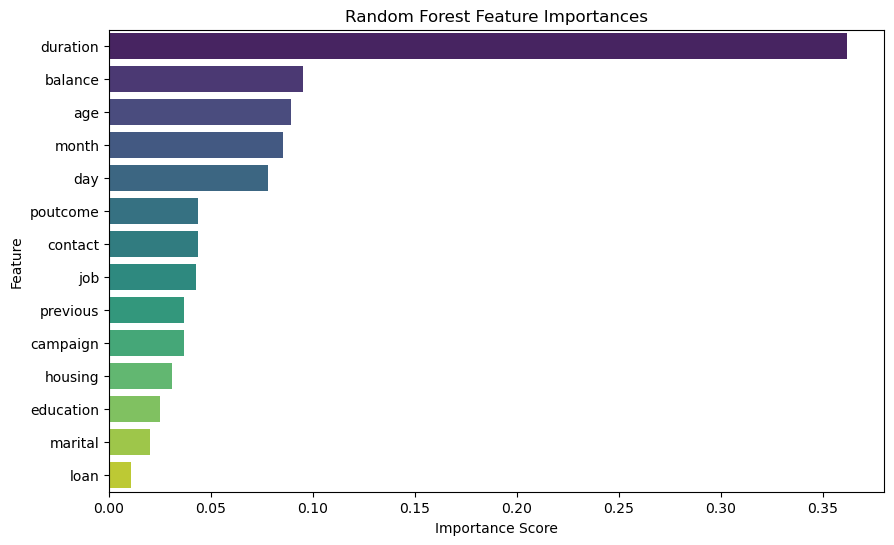

In [58]:
#plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='name', data=feature_importance, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### • Confusion Matrix for Model Evaluation 

In [71]:
cm = confusion_matrix(y_test, y_pred_rf)
print(f"Random Forest Confusion Matrix:\n{cm}")

Random Forest Confusion Matrix:
[[976 203]
 [134 918]]


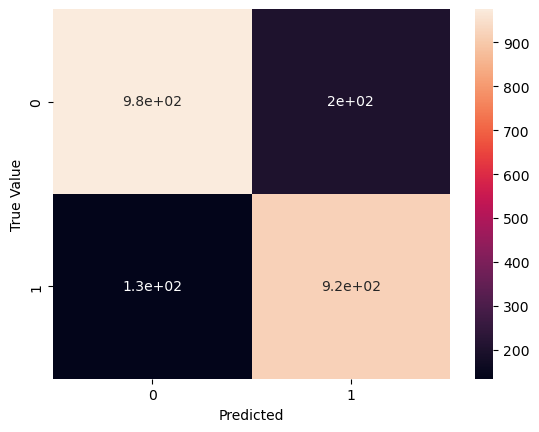

In [72]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()